# Visualization Recursive Feature Elimination 

In [1]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score, f1_score, auc, precision_recall_curve, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix 
from collections import Counter

# Import data 

In [2]:
# Load the data into pandas dataframes
X_train = pd.read_csv('/Users/dionnespaltman/Desktop/V6/X_train_smote_12-06-2024.csv')
y_train = pd.read_csv('/Users/dionnespaltman/Desktop/V6/y_train_smote_12-06-2024.csv')
X_test = pd.read_csv('/Users/dionnespaltman/Desktop/V6/X_test_12-06-2024.csv')
y_test = pd.read_csv('/Users/dionnespaltman/Desktop/V6/y_test_12-06-2024.csv')

In [3]:
# Drop unnamed columns 
X_train = X_train.drop(columns='Unnamed: 0', axis=1)
y_train = y_train.drop(columns='Unnamed: 0', axis=1)
X_test = X_test.drop(columns='Unnamed: 0', axis=1)
y_test = y_test.drop(columns='Unnamed: 0', axis=1)

In [4]:
print(list(X_train.columns))

['Condition', 'Sum_456', 'Sum_1', 'Sum_2', 'AU01_r__sum_values', 'AU01_r__variance', 'AU01_r__standard_deviation', 'AU01_r__maximum', 'AU01_r__mean', 'AU01_r__root_mean_square', 'AU02_r__sum_values', 'AU02_r__variance', 'AU02_r__standard_deviation', 'AU02_r__maximum', 'AU02_r__mean', 'AU02_r__root_mean_square', 'AU04_r__sum_values', 'AU04_r__variance', 'AU04_r__standard_deviation', 'AU04_r__maximum', 'AU04_r__mean', 'AU04_r__root_mean_square', 'AU05_r__sum_values', 'AU05_r__variance', 'AU05_r__standard_deviation', 'AU05_r__maximum', 'AU05_r__mean', 'AU05_r__root_mean_square', 'AU06_r__sum_values', 'AU06_r__variance', 'AU06_r__standard_deviation', 'AU06_r__maximum', 'AU06_r__mean', 'AU06_r__root_mean_square', 'AU07_r__sum_values', 'AU07_r__variance', 'AU07_r__standard_deviation', 'AU07_r__maximum', 'AU07_r__mean', 'AU07_r__root_mean_square', 'AU09_r__sum_values', 'AU09_r__variance', 'AU09_r__standard_deviation', 'AU09_r__maximum', 'AU09_r__mean', 'AU09_r__root_mean_square', 'AU10_r__sum

In [5]:
columns_to_drop = ['Condition', 'Sum_456']

In [6]:
X_train = X_train.drop(columns=columns_to_drop, axis=1)
X_test = X_test.drop(columns=columns_to_drop, axis=1)

In [7]:
print(len(X_train.columns))
print(list(X_train.columns))

104
['Sum_1', 'Sum_2', 'AU01_r__sum_values', 'AU01_r__variance', 'AU01_r__standard_deviation', 'AU01_r__maximum', 'AU01_r__mean', 'AU01_r__root_mean_square', 'AU02_r__sum_values', 'AU02_r__variance', 'AU02_r__standard_deviation', 'AU02_r__maximum', 'AU02_r__mean', 'AU02_r__root_mean_square', 'AU04_r__sum_values', 'AU04_r__variance', 'AU04_r__standard_deviation', 'AU04_r__maximum', 'AU04_r__mean', 'AU04_r__root_mean_square', 'AU05_r__sum_values', 'AU05_r__variance', 'AU05_r__standard_deviation', 'AU05_r__maximum', 'AU05_r__mean', 'AU05_r__root_mean_square', 'AU06_r__sum_values', 'AU06_r__variance', 'AU06_r__standard_deviation', 'AU06_r__maximum', 'AU06_r__mean', 'AU06_r__root_mean_square', 'AU07_r__sum_values', 'AU07_r__variance', 'AU07_r__standard_deviation', 'AU07_r__maximum', 'AU07_r__mean', 'AU07_r__root_mean_square', 'AU09_r__sum_values', 'AU09_r__variance', 'AU09_r__standard_deviation', 'AU09_r__maximum', 'AU09_r__mean', 'AU09_r__root_mean_square', 'AU10_r__sum_values', 'AU10_r__v

In [8]:
# Convert the DataFrame to a 1-dimensional NumPy array
y_train= y_train.values.ravel()
y_test = y_test.values.ravel()

# RFE

In [9]:
display(X_train)

,Sum_1,Sum_2,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,AU02_r__sum_values,AU02_r__variance,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,12.000000,11.000000,0.919310,0.742910,0.847697,0.293698,0.830565,0.850749,0.485652,-0.019882,...,-0.408243,0.425279,-0.263230,-0.352093,0.970489,0.303553,0.447869,0.118497,1.010999,0.604244
1,11.000000,10.000000,-0.631136,-0.940957,-1.033638,0.293698,-1.333231,-1.131787,-0.198166,-0.410164,...,-0.807795,0.425279,-1.083828,-0.956263,0.265217,-0.581863,-0.586285,-0.436941,-0.690791,-0.627719
2,8.000000,8.000000,1.815800,0.489371,0.618471,0.293698,0.502919,0.589230,1.220328,-0.116460,...,-0.106153,0.338793,-0.903012,-0.467784,2.738438,0.349732,0.495312,0.760722,1.340506,0.733533
3,8.000000,8.000000,-1.082503,-0.947092,-1.043026,0.293698,-0.992134,-1.048249,-0.932584,-0.623317,...,-1.011057,-1.321739,-0.995226,-1.029314,-0.648617,-0.463357,-0.430560,-1.235383,-0.347166,-0.420355
4,8.000000,8.000000,-0.468956,0.765159,0.867251,0.293698,0.251033,0.703075,-0.188708,0.531833,...,-0.891051,-0.716337,-0.741624,-0.842706,-0.648377,0.115383,0.249103,0.864866,0.103879,0.211850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,10.591267,11.000000,0.404780,-0.213730,-0.122362,0.044925,0.080427,-0.068330,0.151535,-0.241475,...,0.300615,0.399711,0.416752,0.357324,0.224620,-0.040184,0.057747,0.705928,-0.190008,-0.008415
254,13.316483,9.316483,-0.387304,0.048483,0.186925,0.249664,-0.208703,0.074278,-0.191856,0.240390,...,0.653529,0.425279,0.613156,0.641681,-0.360287,-0.234234,-0.149341,-0.536546,-0.141645,-0.154002
255,9.826138,9.369604,0.278411,-0.036299,0.071646,0.293698,0.346129,0.150659,-0.257221,-0.271857,...,0.857897,0.385795,1.021472,0.949439,-0.080333,-0.052434,0.018721,0.638470,-0.105022,-0.017082
256,15.873762,14.781560,1.109901,0.315526,0.453389,-0.718435,0.009169,0.330545,0.530761,-0.447359,...,-1.563444,-0.007322,-1.529979,-1.582537,2.185380,0.938926,1.060632,0.864866,0.940212,1.043909


In [10]:
!pip install yellowbrick

# SVC with Recall 

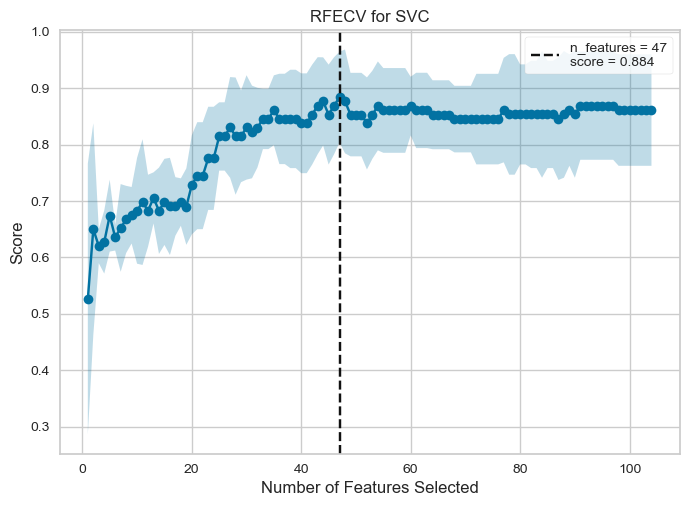

<Axes: title={'center': 'RFECV for SVC'}, xlabel='Number of Features Selected', ylabel='Score'>

In [11]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from yellowbrick.model_selection import RFECV
from sklearn.metrics import make_scorer, recall_score
import matplotlib.pyplot as plt

# Create a recall scorer
recall_scorer = make_scorer(recall_score)

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(SVC(kernel='linear', C=1), scoring=recall_scorer)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

# Decision tree with Recall 
Running the code below took less than 4 minutes. 

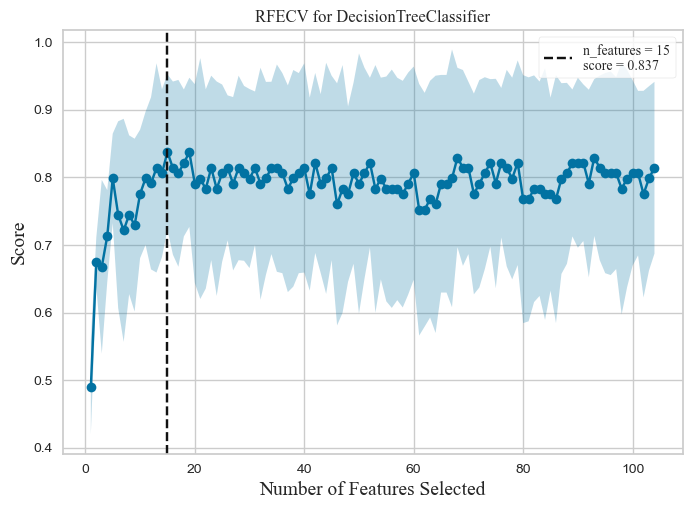

<Axes: title={'center': 'RFECV for DecisionTreeClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [11]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from yellowbrick.model_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, recall_score
import matplotlib.pyplot as plt

# Create a recall scorer
recall_scorer = make_scorer(recall_score)

# Instantiate RFECV visualizer with a DecisionTreeClassifier and the recall scorer
visualizer = RFECV(DecisionTreeClassifier(), scoring=recall_scorer)

# Fit the data to the visualizer
visualizer.fit(X_train, y_train)

# Set the title with the desired font properties
visualizer.ax.set_title('Your Custom Title', fontsize=16, fontname='Times New Roman')

# Set the font properties for x and y axis titles
visualizer.ax.set_xlabel(visualizer.ax.get_xlabel(), fontsize=14, fontname='Times New Roman')
visualizer.ax.set_ylabel('Recall', fontsize=14, fontname='Times New Roman')

# Customize other font properties if needed
plt.rcParams['font.family'] = 'Times New Roman'

# Finalize and render the figure
visualizer.show()


# Decision tree with F1-score
Running the code below took less than 4 minutes. 

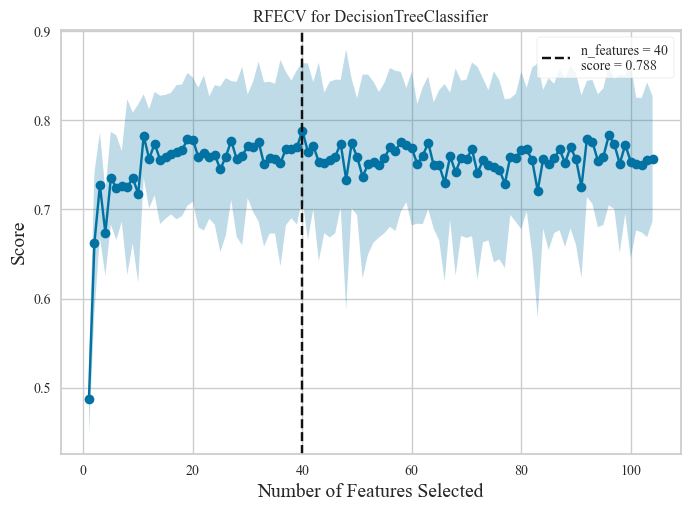

<Axes: title={'center': 'RFECV for DecisionTreeClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [12]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from yellowbrick.model_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score
import matplotlib.pyplot as plt

# Create an F1-score scorer
f1_scorer = make_scorer(f1_score)

# Instantiate RFECV visualizer with a DecisionTreeClassifier and the F1-score scorer
visualizer = RFECV(DecisionTreeClassifier(), scoring=f1_scorer)

# Fit the data to the visualizer
visualizer.fit(X_train, y_train)

# Set the title with the desired font properties
visualizer.ax.set_title('Your Custom Title', fontsize=16, fontname='Times New Roman')

# Set the font properties for x and y axis titles
visualizer.ax.set_xlabel(visualizer.ax.get_xlabel(), fontsize=14, fontname='Times New Roman')
visualizer.ax.set_ylabel('F1 Score', fontsize=14, fontname='Times New Roman')

# Customize other font properties if needed
plt.rcParams['font.family'] = 'Times New Roman'

# Finalize and render the figure
visualizer.show()